In [214]:
# HW - compute the spectogram of a classical music song, or a song of your choice
# see if you can classify jazz vs classical vs pop music

In [215]:
import scipy
import scipy.io
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import sounddevice as sd

In [216]:
# classical song - Chopin's Marche Funèbre (Funeral March) piano sonata i - VI 

In [218]:
sampling_rate = 24000
y, sr = librosa.load('chopin.mp3', sr=sampling_rate)

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


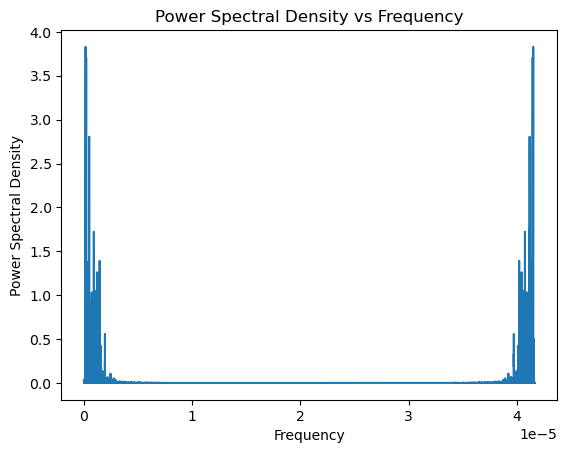

In [219]:
# computing fft

# now doing it on the shorter piece of data
# y = y[0:100000]

n = len(y)
fft = np.fft.fft(y)
PSD = fft * np.conj(fft) / n
freq = (1/(sr*n)) * np.arange(n) # create x-axis of frequencies


# plotting PSD vs frequency
plt.plot(freq, PSD)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density vs Frequency')
plt.show()

In [220]:
# use PSD to filter out noise -> stuff with fourier coefficients under certain threshold zerod
indices = PSD > 0.6 # threshold -> use 0.6 if doing all
PSDclean = PSD * indices
fhat = indices * fft
ffilt = np.fft.ifft(fhat).astype('float')

C:\Users\itsjo\AppData\Local\Temp\ipykernel_6100\3547165843.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ffilt = np.fft.ifft(fhat).astype('float')


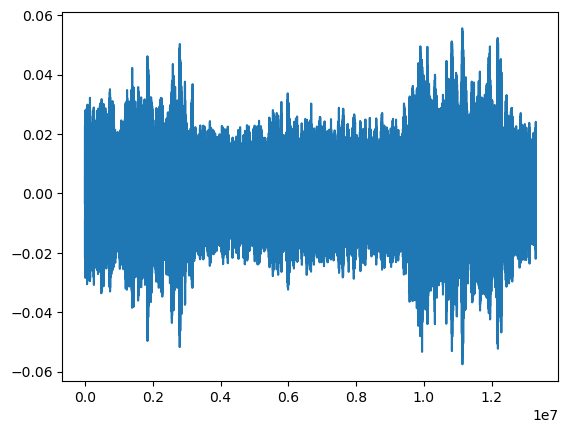

In [221]:
# taking out the noise using FFT power spectrum
plt.plot(ffilt)

plt.show()

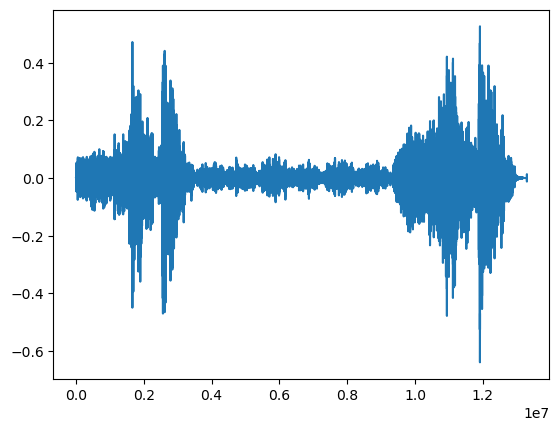

In [222]:
# taking out the noise using FFT power spectrum
plt.plot(y)

plt.show()

In [223]:
# computing the fourier transform
D = librosa.stft(y[0:100000], n_fft=5000, win_length=5000)

# converting to log Db scale so we can see the different notes
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [224]:
D_filt = librosa.stft(ffilt[0:100000], n_fft=5000, win_length=5000)
DB_filt = librosa.amplitude_to_db(np.abs(D_filt), ref=np.max)

In [241]:
# use this to plot frequencies
freq = lambda n: 440 * (2 ** (1/12)) ** (n - 49)
# print(freq(40))  # frequency of 40th key = C -> 261.63 Hz which is right

x = range(1, 73)

freqs = [freq(n) for n in x]

notes = ["A", "Bb", "B", "C", "Db", "D", "Eb", "E", "F", "Gb", "G", "Ab"]
notes *= 6

In [242]:
73-37

36

In [243]:
freqs

[27.499999999999947,
 29.13523509488056,
 30.867706328507698,
 32.703195662574764,
 34.647828872108946,
 36.708095989675876,
 38.890872965260044,
 41.20344461410867,
 43.65352892912541,
 46.24930283895422,
 48.99942949771858,
 51.913087197493056,
 54.999999999999915,
 58.270470189761156,
 61.73541265701542,
 65.40639132514957,
 69.29565774421793,
 73.4161919793518,
 77.78174593052012,
 82.40688922821738,
 87.30705785825087,
 92.4986056779085,
 97.99885899543722,
 103.82617439498618,
 109.99999999999989,
 116.54094037952237,
 123.4708253140309,
 130.8127826502992,
 138.59131548843592,
 146.83238395870364,
 155.56349186104035,
 164.81377845643485,
 174.61411571650183,
 184.9972113558171,
 195.99771799087452,
 207.65234878997245,
 219.9999999999999,
 233.08188075904488,
 246.94165062806198,
 261.6255653005985,
 277.182630976872,
 293.66476791740746,
 311.1269837220808,
 329.62755691286986,
 349.2282314330038,
 369.99442271163434,
 391.99543598174927,
 415.3046975799451,
 440.0,
 466.16376

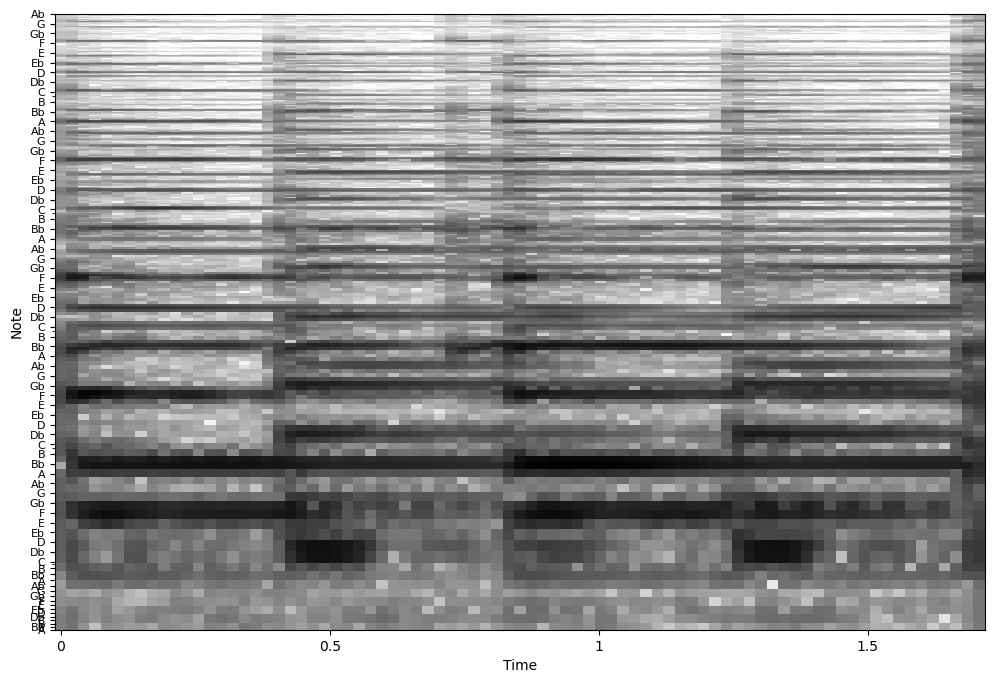

In [246]:
# Display spectogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log', cmap='Greys')

plt.ylim(210, 1000)

plt.yticks(freqs, notes, fontsize=8)

# Set y-axis label
plt.ylabel('Note')


plt.show()

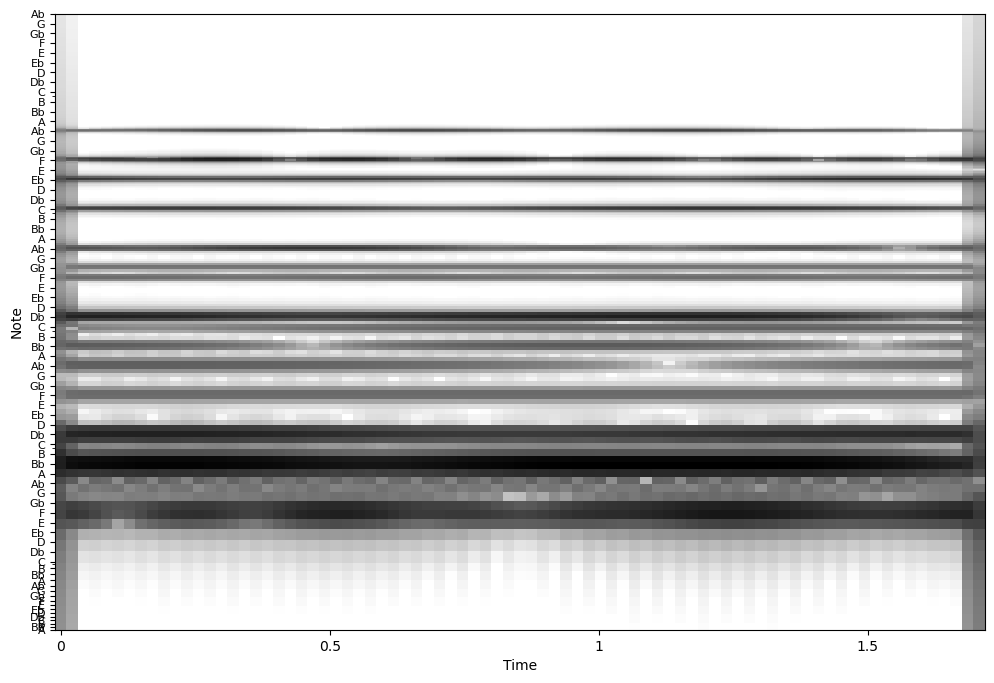

In [248]:
# Display filtered spectogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB_filt, sr=sr, x_axis='time', y_axis='log', cmap='Greys')

plt.ylim(210, 1000)
# Set y-axis label
plt.ylabel('Note')
plt.yticks(freqs, notes, fontsize=8)


plt.show()

In [228]:
np.size(y)

13297372

In [229]:
sd.play(ffilt[0:100000], sr)

In [230]:
sd.play(y[0:100000], sr)

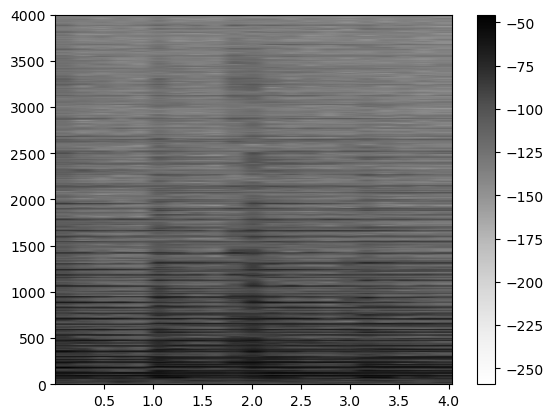

In [231]:
plt.specgram(y[0:100000], NFFT=5000, Fs=sr, noverlap=400, cmap="Greys")
plt.colorbar()
plt.ylim(0, 4000)
plt.show()